In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
def box_plot(alg, save=None): 
    index = 0
    data_rep = [np.array(deseq_2)[:, index], np.array(deseq_2_dca)[:, index], np.array(mast)[:, index], \
                np.array(edgeR)[:, index], np.array(scVI_no_lib)[:, index], np.array(scVI)[:, index]]
    index = 2
    data_auc = [np.array(deseq_2)[:, index], np.array(deseq_2_dca)[:, index], np.array(mast)[:, index], \
                np.array(edgeR)[:, index], np.array(scVI_no_lib)[:, index], np.array(scVI)[:, index]]

    props = dict(widths=0.2, patch_artist=True, medianprops=dict(color="black"), whis=[5, 95], sym="")
    fig, ax1 = plt.subplots(figsize=(5, 5))
    ax1.set_ylabel("Mixture weight for reproducibility")
    ax1.set_xlabel("Testing procedures")
    ax2 = ax1.twinx()
    ax2.set_ylabel("AUC")

    bp1 = ax1.boxplot(data_rep, positions=[0, 1, 2, 3, 4, 5], **props)
    for patch in bp1['boxes']:
        patch.set_facecolor('lightblue')
        
    bp2 = ax2.boxplot(data_auc, positions=[0.2, 1.2, 2.2, 3.2, 4.2, 5.2], **props)
    for patch in bp2['boxes']:
        patch.set_facecolor('lightgreen')
    
    ax1.get_xaxis().tick_bottom()
    ax1.get_yaxis().tick_left()

    ax1.set_xticklabels(['DESeq2','DCA\n+DESeq2', 'MAST', 'edgeR', 'scVI\n(NoLib)', 'scVI'])

    ax1.set_axisbelow(True)
    
    ax1.spines['left'].set_color('b')
    ax1.yaxis.label.set_color('b')
    ax1.tick_params(axis='y', colors='b')
    
    ax2.spines['right'].set_color('g')
    ax2.yaxis.label.set_color('g')
    ax2.tick_params(axis='y', colors='g')

    ax1.set_title("Comparison of reproducibility ("+ alg +")")
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    plt.tick_params(axis='x', which='major', labelsize=14)



In [4]:
# B DC
deseq_2 = [[0.11741414958505153, 0.46480277607677273, 0.65636072940973111],
 [0.10759959511325189, 0.47899474719047708, 0.63206060667711039],
 [0.11960155733578309, 0.47654245089388236, 0.6504733567619736],
 [0.12757392356629149, 0.46536453626650931, 0.65603794520045478],
 [0.13784438394717619, 0.40958746141219154, 0.65992948386432093],
 [0.12361222619370456, 0.47878914254184418, 0.64555315209639086],
 [0.11952935999511141, 0.43054420666074439, 0.65470886911726212],
 [0.12466266508437869, 0.47282099811115713, 0.64785912531024947],
 [0.10941194200910688, 0.48291628344833881, 0.64141309132363589],
 [0.13169237680354001, 0.4501409997964449, 0.65938207506934399],
 [0.12060901895795394, 0.41306988205281714, 0.65136062679038242],
 [0.12748558656081724, 0.4398508385937811, 0.64991692404921353],
 [0.11733752765011325, 0.46103557145565849, 0.64440246483889996],
 [0.11207959182688489, 0.4373877861136885, 0.6442139640501614],
 [0.11613204182590799, 0.45878533540939015, 0.64336611938204036],
 [0.12024105238147084, 0.45346634483900305, 0.65241784439860695],
 [0.11714450926314225, 0.4314352599066732, 0.64524759405607646],
 [0.11484686695610605, 0.46453935240363348, 0.65301430404701111],
 [0.11619672282594204, 0.41121937551081617, 0.64685842937790861],
 [0.10973834363091307, 0.41848310065311606, 0.64389794534081024]]

deseq_2_dca = [[0.20579102816569819, 0.50700714976269023, 0.67157251709257715],
 [0.18058755047714981, 0.49782412849795693, 0.66170187368282396],
 [0.18205883823373051, 0.46225563725478108, 0.66578333686665248],
 [0.2278194853744466, 0.50342213375738987, 0.67223089285162407],
 [0.22812672997825545, 0.54917835812372995, 0.66843008987057928],
 [0.22062963275894731, 0.43697002174118799, 0.69418578460456637],
 [0.21857668810339298, 0.66953554518025582, 0.65516347380074835],
 [0.1866262645253581, 0.5108688836529699, 0.6555767614511836],
 [0.22643630937751896, 0.60042451069729108, 0.6646308859017338],
 [0.2168311220627111, 0.50005428379919303, 0.66589880188473105],
 [0.24242353043242065, 0.56622430811054847, 0.69005335669347778],
 [0.17019556764117594, 0.44406928853146871, 0.65805407155577145],
 [0.22190486950121596, 0.61340128907657154, 0.68259697791406981],
 [0.20105116498883821, 0.5409368547746497, 0.65572889619756503],
 [0.18637336295159221, 0.44811322631735973, 0.66199251735432885],
 [0.17266588007687542, 0.47935498169189567, 0.65158790170132319],
 [0.22436243141291032, 0.5844902379268978, 0.67046648176560841],
 [0.18481191001782554, 0.50832858270150993, 0.66454407421942852],
 [0.2036333998475498, 0.57119740037876809, 0.65944604128560225],
 [0.21106741286959002, 0.57123566295546579, 0.67129713231833132]]

mast = [[0.17851346067208354, 0.46989497681412823, 0.69122962490180673],
 [0.16629310364321667, 0.46571524382811907, 0.68348978790259229],
 [0.17115757329879461, 0.44979167004257647, 0.68513084249803624],
 [0.17473096182545481, 0.4794730008164792, 0.68550225844461909],
 [0.17593017161777771, 0.46319492238572202, 0.69763599764336215],
 [0.19010399556831639, 0.48104285843731359, 0.6955768853102906],
 [0.17774208150432469, 0.539752379363582, 0.67826369795758057],
 [0.17808414044067419, 0.4840975877351838, 0.68968381775333865],
 [0.18937042357614209, 0.47863120440129253, 0.70118789277297711],
 [0.18019651015957894, 0.47214215627469286, 0.68856294186959932],
 [0.18177302272058862, 0.47293010332832802, 0.68640784564022006],
 [0.17511102344774351, 0.47053643537273859, 0.68892380204241954],
 [0.18206733946070164, 0.45886173472750952, 0.69174759426551458],
 [0.18988302403864285, 0.49618649457119884, 0.69801109583660637],
 [0.18133117650784641, 0.45170598723653099, 0.69282354673998425],
 [0.18134769042252544, 0.47247236808842197, 0.69520227808326784],
 [0.17126939125392707, 0.41592600890537612, 0.68703505498821682],
 [0.18094242256977541, 0.46593535357365679, 0.69052042419481552],
 [0.17022953256483886, 0.4756535821493863, 0.67969903770620577],
 [0.17198543325506635, 0.4780190402502556, 0.68850353495679495]]

scVI = [[0.25724154085372603, 0.37049454404422527, 0.73733843976578373],
 [0.21810379885743153, 0.26976480071273656, 0.71915334283462562],
 [0.23106829336368884, 0.26291465427941019, 0.71973472199518962],
 [0.22345172336562469, 0.38346303524893816, 0.72596094324645155],
 [0.23451569385936977, 0.31974426728366506, 0.73635170446242193],
 [0.21432519506074946, 0.46137609696416709, 0.72959419427891714],
 [0.22564926741083061, 0.27445380478974646, 0.72610463718899965],
 [0.23043682668824547, 0.38796165920424114, 0.73131539570184412],
 [0.22038945807746096, 0.39809952184730235, 0.7231740699265895],
 [0.22234404854306311, 0.22589302045842677, 0.71126896892913605],
 [0.22883185800475089, 0.44457518016982928, 0.73776364002945405],
 [0.25765265116578567, 0.3628618249020632, 0.73441450093233396],
 [0.23816566186352697, 0.49077893923962573, 0.74706503343355113],
 [0.22177253002975067, 0.31270996263525008, 0.72429714496354713],
 [0.20357190324293895, 0.45149421416287028, 0.72318068337468755],
 [0.21751544449516047, 0.45231424441555124, 0.73240068278692405],
 [0.23864456129489006, 0.4112423825838748, 0.74048759649711648],
 [0.21915981242759619, 0.36235858682523286, 0.71699046198903416],
 [0.234765165155806, 0.44773138723576916, 0.73769137016148967],
 [0.24624159763052147, 0.39721872876082082, 0.73522830744798839]]

scVI_no_lib = [[0.12687984997893603, 0.32098202080142063, 0.62749683845685467],
 [0.11144928257795926, -0.019496306112939652, 0.61393531393515177],
 [0.120297729458015221, 0.61715689346234459, 0.62309841738624119],
 [0.12743320232632135, 0.26421509907262947, 0.63334596692062761],
 [0.11167944290874438, 0.40104497522258437, 0.59762329412236226],
 [0.12891890979848317, 0.31227512977537114, 0.62154344232255709],
 [0.12566711199636241, 0.38097475831580718, 0.61946107416445439],
 [0.1381526177211039, 0.48690318033279123, 0.63155857624750844],
 [0.10118813579397311, 0.51434093567566275, 0.57055892091563309],
 [0.1269559456515558, 0.50590387139729942, 0.6139818965488637],
 [0.12138771716304819, 0.30326404205339857, 0.62512216827215816],
 [0.13629786908015826, 0.43515412033745443, 0.62772858667496145],
 [0.13114342027963158, 0.45548283035890286, 0.62467372166444912],
 [0.12781860502345702, 0.25816931368031726, 0.62448276292819416],
 [0.13000273953263328, 0.41009839215934796, 0.61605014298483707],
 [0.12704372470184358, 0.34767881474164575, 0.61767439431913118],
 [0.11478329618568105, 0.18017239737076948, 0.60442356982428325],
 [0.12947776942047354, 0.42240378498029513, 0.62798232270276677],
 [0.11788755601793477, 0.38253355666683908, 0.61809958132408616],
 [0.11907244170541006, 0.32896751509394628, 0.61934016863478036]]

edgeR = [[0.21486882774357749, 0.560462079662708, 0.74813297651129107],
 [0.20466536196194213, 0.53133635083685382, 0.74727881971720356],
 [0.23700938426523466, 0.56705194950592452, 0.76305577376276512],
 [0.24661767879871183, 0.58364145315470706, 0.75690277615283041],
 [0.18971249188471551, 0.52398133733323327, 0.73934646312604024],
 [0.20596392157852791, 0.53901304506134529, 0.74893892306467136],
 [0.20316969245583594, 0.54907034457898551, 0.74990610808679736],
 [0.20015519234828311, 0.52634690651529448, 0.74788349930736275],
 [0.20420974347031168, 0.51824491278269946, 0.75234311939413667],
 [0.22090653128407267, 0.54687083055772467, 0.75275432664750808],
 [0.19969046274288904, 0.53523222898616274, 0.74959493750534589],
 [0.21288047183483019, 0.52516533518726838, 0.7534998087751088],
 [0.2172470604906194, 0.54586134017801757, 0.74206637912473072],
 [0.22202804496314543, 0.55082312673374301, 0.76391787849501591],
 [0.2221164283288099, 0.54626560915162081, 0.75380188511365831],
 [0.21542463081604782, 0.56119531408703649, 0.75364113822560985],
 [0.19876570301679736, 0.53329324445203474, 0.74423597053268675],
 [0.19778061750115253, 0.53817589478819239, 0.74515055642019135],
 [0.19885689890811861, 0.51883987407083265, 0.74604080906317505],
 [0.22244141387486258, 0.56577373208407422, 0.75540468397751703]]

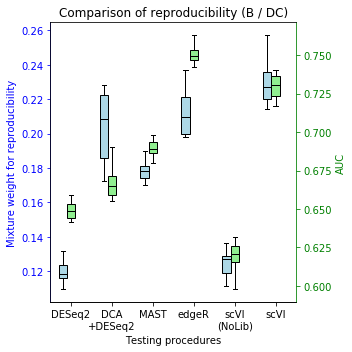

In [5]:
box_plot("B / DC")
plt.tight_layout()
plt.savefig("BDC_reproducability.pdf", transparency=True)

In [6]:
# CD4 CD8
deseq_2 = [[0.032902867101084761, 0.75064093569227797, 0.52526938374252241],
 [0.036789116382926083, 0.72017810096583035, 0.5179735461816265],
 [0.056749138334733717, 0.56656014843078162, 0.52498740987703107],
 [0.053730686712023967, 0.53090684455984949, 0.5306070519810977],
 [0.039129326918783583, 0.67061776463314104, 0.56007875281260056],
 [0.034052745141134398, 0.69409934011357677, 0.52993442061155505],
 [0.053500138973116597, 0.60034740095641459, 0.52857115763920492],
 [0.036578018526089592, 0.71090287459174029, 0.52722321624760649],
 [0.033767152313007941, 0.70978620792624969, 0.51776167095316028],
 [0.037461152311075947, 0.70510829261397867, 0.52464612260895827],
 [0.032786172923720942, 0.71062023825762077, 0.53715575721464059],
 [0.036776903122752322, 0.69476703943609541, 0.50803282689608897],
 [0.031149835542971429, 0.73337895785256335, 0.51878387978316931],
 [0.031469050849262284, 0.76241826912790078, 0.52070611885915308],
 [0.032477264713363083, 0.76937458923521596, 0.53382288143281109],
 [0.037800571718959758, 0.69876076492377492, 0.52646699039922895],
 [0.03941311672865884, 0.70365038370668653, 0.53003174925384489],
 [0.037672128241556378, 0.73211051514709979, 0.53377095631641092],
 [0.033399164282163565, 0.69160867743950627, 0.51726138265245813],
 [0.039219063521729651, 0.74222275590963471, 0.51529748873958892]]

deseq_2_dca = [
 [0.0497037227882308, 0.58078312654309749, 0.62199830820520472],
 [0.07733074558736814, 0.48397284168610694, 0.71515758547008557],
 [0.06257998047460801, 0.016317997690419361, 0.67451752158456069],
 [0.086450306038705196, 0.53922894581800163, 0.63301587301587292],
 [0.086468487258662907, 0.59331227589510838, 0.72503779425527326],
 [0.07918460829624941, 0.016962779639238448, 0.65751213911996065],
 [0.062318395072117852, 0.48242944351930378, 0.59977375565610858],
 [0.055800976583475125, 0.5188175622655965, 0.66626262626262633],
 [0.054692123635871941, 0.48543906098858219, 0.60231098867462496],
 [0.083587051426320461, 0.61780359844245758, 0.66115392849496901],
 [0.04014780116715893, 0.076096292640200569, 0.70278430057027852],
 [0.07918291139127509, 0.51204511166293298, 0.66572671608121181],
 [0.075473508651269769, 0.45458195990660699, 0.69279835390946498],
 [0.061786909002375406, 0.47193416206890665, 0.642578125],
 [0.083833012457098469, 0.56593427390359041, 0.68086138914164396],
 [0.069258277079612574, 0.57965854208889178, 0.59223037218147245],
 [0.061069088574662277, 0.45225252707896363, 0.6108675799086758],
 [0.03502732205886398, -0.004893842549684644, 0.66248913358446826],
 [0.059414979857081246, 0.42839570144658762, 0.61451612903225805],
 [0.066309415934341281, 0.53744579953208127, 0.59359243697478992]]

mast = [[0.065781157888356173, 0.76990326605871884, 0.7609410028266288],
 [0.062784048122332473, 0.80917994940195381, 0.71204310957015748],
 [0.063971421212487903, 0.77001789394647091, 0.72957517022432006],
 [0.060448377538310706, 0.8125881475527672, 0.72636840859406548],
 [0.066768861752931272, 0.7854925099161234, 0.70587186877758745],
 [0.063340469095832436, 0.81813090452909309, 0.72191960120862753],
 [0.061036225462394837, 0.82093187501924691, 0.75659941239539386],
 [0.070572252155508608, 0.77022310055222787, 0.74184663798265049],
 [0.063235704755484873, 0.81860553895462995, 0.72209226227773371],
 [0.066928372070680031, 0.82596621361863576, 0.72422685436595791],
 [0.07967038190921473, 0.79923288463129472, 0.7388919058161717],
 [0.063989746041377762, 0.78559024397455945, 0.72696993747998384],
 [0.067434143767636387, 0.75430709654858719, 0.74708773688680941],
 [0.059395332998462259, 0.71476823798946998, 0.74906916189760087],
 [0.063526875290721915, 0.79988289017266589, 0.75284681899828731],
 [0.066169561989585887, 0.79532265352750287, 0.73440828773131717],
 [0.062650195078347529, 0.76764944984080585, 0.72528649205619833],
 [0.069350135570590304, 0.7682962580970627, 0.73030619491206816],
 [0.067181831562086514, 0.80766849220846715, 0.71682052995808787],
 [0.062791723026266705, 0.7960548046500352, 0.71742762855591291]]

scVI = [[0.098108508496392563, 0.76511638981753405, 0.82310038013283759],
 [0.10204886779415501, 0.70559338770095492, 0.82108414442262967],
 [0.11053901515006451, 0.69656060675883413, 0.78205578066474501],
 [0.092319871276983725, 0.75723638566778373, 0.80160268460113904],
 [0.10156801503751359, 0.7382247663015209, 0.82806995558154761],
 [0.10206720808484628, 0.70380010211152277, 0.80169319241962211],
 [0.10589606104052082, 0.73693905456759179, 0.81384073408802937],
 [0.10620354898278878, 0.75646847465937639, 0.82342063856747005],
 [0.097921473404904508, 0.75796747476541115, 0.81295514989487172],
 [0.092789054478554761, 0.73459653939862057, 0.81260982775665924],
 [0.088293580578149497, 0.74538494957435986, 0.83092304050572996],
 [0.10187200258874622, 0.7088680537106169, 0.81948842196137406],
 [0.10782533176872471, 0.62747860333644001, 0.81671888271579163],
 [0.098193959043374954, 0.7198167556853412, 0.81551304008800152],
 [0.1058205210091665, 0.73219537986968686, 0.80469526713730732],
 [0.096766357602624781, 0.75189995521832131, 0.83666262862553431],
 [0.093813102157982414, 0.72955218570467406, 0.82549257139674448],
 [0.098206027631515744, 0.72704347473793207, 0.83521868081373496],
 [0.10087971933080717, 0.73601816949634091, 0.81633178773827919],
 [0.10195776630365359, 0.71751856584781126, 0.81869473801467629]]

scVI_no_lib = [[0.089411148098399035, 0.76943512037782669, 0.81126056504727284],
 [0.097697294758393144, 0.72031450712529499, 0.82797109319520457],
 [0.10293010156090901, 0.72202288045192453, 0.8268627205257808],
 [0.096726486445407378, 0.69592742859898826, 0.83569489118175366],
 [0.093139238312065595, 0.73138826651459399, 0.80550705264770173],
 [0.097900788281656465, 0.73993351525596673, 0.81375161869752288],
 [0.10473230337134314, 0.68348900038450378, 0.82216466853252013],
 [0.10152574734162342, 0.67757499760032369, 0.8287995878413188],
 [0.10103135966071912, 0.74248040766493106, 0.83950596655387999],
 [0.091968102768194407, 0.72841286063547794, 0.80836013757188407],
 [0.094143393092213423, 0.72561847890562647, 0.81763231546848236],
 [0.090737408431639868, 0.75829391176149707, 0.80582452622638101],
 [0.094294021150732543, 0.73631162897878344, 0.8182394140663074],
 [0.094678227916538904, 0.66760274887868587, 0.84441427517161682],
 [0.095239947050295343, 0.71326895302743742, 0.83076987342829689],
 [0.10855094249690764, 0.62600573960648498, 0.84072851831739004],
 [0.098800461891832669, 0.7478142852507802, 0.81618697522870631],
 [0.085899727070195622, 0.76538742358623602, 0.81733433588147653],
 [0.094458796265872169, 0.71819459241832118, 0.80283498336048575],
 [0.095507892399802341, 0.67688626252954531, 0.82497876547335591]]

edgeR = [[0.073530264912539028, 0.76195418663262859, 0.77699152011362205],
 [0.068250986446227457, 0.76407072488814065, 0.75826893353941272],
 [0.077765533677118415, 0.77260147889449005, 0.7276271634849687],
 [0.06571610300534475, 0.74687195787500604, 0.72894300792291511],
 [0.066476238389557463, 0.81145682788121143, 0.72523775707701532],
 [0.073137387809561, 0.73231267047962778, 0.75063842822729998],
 [0.067199978491508036, 0.82443267559563582, 0.7312196276647589],
 [0.076060841551785857, 0.73331833113736489, 0.74386148126488161],
 [0.066649895844789767, 0.7419593462360633, 0.75332442179428261],
 [0.070325053965708775, 0.75922082702337057, 0.70693150646782799],
 [0.070269363881499861, 0.77580140511537032, 0.75295125109653716],
 [0.066838485681943213, 0.78232651181128521, 0.73260509350153857],
 [0.072138465222251119, 0.75967116402180879, 0.72413077683556826],
 [0.070912261946707938, 0.77283260186826508, 0.7374312488686523],
 [0.077054115195049844, 0.76841790311523128, 0.76475486305470852],
 [0.067760362192793133, 0.77206408028342466, 0.73434284361641389],
 [0.07224165860596303, 0.77594926120694474, 0.74223373296016271],
 [0.072709432948611694, 0.78839349006976422, 0.71921132879401817],
 [0.069727937232613127, 0.80565268488927322, 0.75851539329128215],
 [0.06013452783126641, 0.71649494666524693, 0.75402759792249752]]

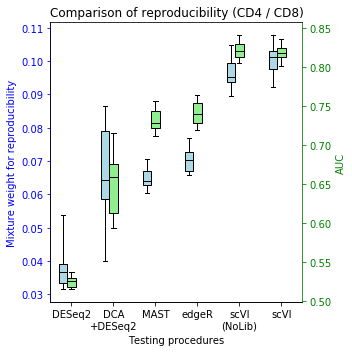

In [7]:
box_plot("CD4 / CD8")
plt.tight_layout()
plt.savefig("CD_reproducability.pdf", transparency=True)